# Stephanie's Working Notebook

In [317]:
# python data manipulation and analysis library
import numpy as np

# python library supporting operations on multidimensional arrays and matrices 
import pandas as pd

# python plotting library for visualizations
import matplotlib.pyplot as plt

# data visualization library for python based on matplotlib providing higher level visual interface and options
import seaborn as sns

# formatting for notebook grids
plt.style.use('seaborn-whitegrid')

from sklearn.feature_extraction.text import CountVectorizer


## Work starting Tuesday, 2/22
Goals for today:
- *Watch video on topic*
    - [Sesame Street Topic Modeling](https://www.youtube.com/watch?v=28r4oFCh_1g)
    - [Intro to Topic Modeling](https://www.youtube.com/watch?v=p1I9Sa1lRvk)
- ✅ Pull Kan’s CSV file
- ✅ Add my sentiment scores to data
- ✅ Add Key players (from Kan) issues tagging `sender` will check code later
- 🔲 Exploratory ?s, viz, and statistics

<br>

`df2` has sentiment scores based on lemmatized text<br>
🚩 `df3` has sentiment scores based on raw text (when run algorithms when have more time)

In [2]:
# importing data
df = pd.read_csv('csv_files/sentiment.csv')

# preview data
df.head()

,Unnamed: 0,file,message,date,sender,subject,content,clean,tokenize,stop_words,lemmatize,sentiment
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,NaN,Here is our forecast\n\n,here is our forecast\n\n,here is our forecast,forecast,forecast,0.0000
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling to have a business meeting takes the...,traveling business meeting takes fun trip espe...,traveling business meeting take fun trip espec...,0.9313
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way to go,test successful way to go,test successful way go,test successful way go,0.5859
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy\n\n can you send me a schedule of the sa...,randy\n\n can you send me a schedule of the sa...,randy send schedule salary level everyone sche...,randy send schedule salary level everyone sche...,0.0000
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let's shoot for tuesday at 1145,let ' s shoot for tuesday at 1145,let ' shoot tuesday 1145,let ' shoot tuesday 1145,-0.3400


In [3]:
# verifying all of the data was brought in
df.shape

(517401, 12)

In [4]:
# only keeping cols I need for exploration
df = df[['date', 'file', 'sender', 'subject', 'content', 'lemmatize', 'sentiment']]

# changing date col dtype to datetime
df.date = pd.to_datetime(df.date)

# preview
df.head()

,date,file,sender,subject,content,lemmatize,sentiment
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313
2,2000-10-18 03:00:00-07:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859
3,2000-10-23 06:13:00-07:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000
4,2000-08-31 05:07:00-07:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400


In [5]:
# verifying all of the data was brought in
df.shape

(517401, 7)

In [14]:
# adding my sentiment scores to data

# installing textblob library for sentiment analysis scoring
from textblob import TextBlob

# sentiment scoring function
def sentiment_scores(string):
    '''
    This function takes in a string of text and applies the textblob function, returning 
    a score for polarity and subjectivity.
    
        - Polarity (float; -1, 1) negative, nuetral, positive sentiment
        - Subjectivity (float; 0, 1) 0, most objective // 1, most subjective
    '''
    
    polarity, subjectivity = TextBlob(str(string)).sentiment
    
    return polarity, subjectivity

# function to add textblob sentiment scores to df
def add_scores(df, clean_msg_col):
    '''
    This function takes in a df and column of strings to apply the sentiment_scores
    textblob function to. It returns a df with the polarity and subjectivity scores added.
    '''
    
    df['polarity, subjectivity'] = df[clean_msg_col].apply(sentiment_scores)
    
    pol = []
    subj = []
    for tuple_ in df['polarity, subjectivity']:
        pol.append(list(tuple_)[0])
        subj.append(list(tuple_)[1])
    
    print('polarity and subjectivity algo complete')
    # df = df.drop(columns = ['polarity, sentiment'])
    df['polarity'] = pol
    df['subjectivity'] = subj
          
    print('added sub and pol to df')
    
    # dropping polarity, subjectivity col
    df.drop(columns = ['polarity, subjectivity'], inplace = True)
    
    return df

In [7]:
df.head(1)

,date,file,sender,subject,content,lemmatize,sentiment
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0


In [8]:
# adding textblob sentiment scores using above function
df2 = add_scores(df, 'lemmatize')

# preview
df2.head(2)

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333


In [11]:
# function for Kan's Sentiment analysis

# importing library
import nltk.sentiment

# creating scoring object
sia = nltk.sentiment.SentimentIntensityAnalyzer()

#creating df3 and adding nltk sentiment score

# df3, dropping sentiment score cols
df3 = df2.copy().drop(columns = ['sentiment', 'polarity', 'subjectivity'])
print('created df3')

# # adding sentiment scores for raw data
# df3['sentiment'] = df3.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
# print('added sentiment scores')

# # preview
# df3.head()

created df3


In [18]:
# # adding polarity and subjectivity scores to df3, using raw data to calculate scores
# df3 = add_scores(df3, 'content')

# preview 
df3.head()

,date,file,sender,subject,content,lemmatize
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...
2,2000-10-18 03:00:00-07:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go
3,2000-10-23 06:13:00-07:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...
4,2000-08-31 05:07:00-07:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145


### adding sentiment scores to `df3` *where I was looking at sentiment algo's on raw email text* taking long time
Will just look at `df2` where sentiment algo's ran on lemmatized, cleaned data for now

> using [POI list](https://github.com/Enron-Discussion-NLP/Capstone/blob/main/00_Kaniela/kan_explore_time_series.ipynb) to create `poi` column

In [50]:
# code to get list of email addresses for given first and last name
df2[(df2.sender.str.contains('ken')) & (df2.sender.str.contains('lay'))]\
        .sender.value_counts()\
        .index\
        .to_list()

['kenneth.lay@enron.com',
 'ken.lay-@enron.com',
 'ken.lay@enron.com',
 'ken.lay-.chairman.of.the.board@enron.com']

In [ ]:
df2[(df2.sender.str.contains('ken')) & (df2.sender.str.contains('lay'))]\
        .sender.value_counts()\
        .index\
        .to_list()

In [59]:
def get_poi_emails(df, f_name, l_name):
    '''
    This function takes in a df, alond with string for first and last names and returns 
    a list of each email from the sender col that contains both the first and last name
    string. Names with common nicknames should be abbrev (ex: Kenneth --> Ken, Daniel --> Dan)
    '''
    
    email_list = df[(df.sender.str.contains(f_name)) & (df.sender.str.contains(l_name))]\
            .sender.value_counts()\
            .index\
            .to_list() 
    
    return email_list

In [61]:
kenneth_lay = get_poi_emails(df2, 'ken', 'lay')
kenneth_lay

['kenneth.lay@enron.com',
 'ken.lay-@enron.com',
 'ken.lay@enron.com',
 'ken.lay-.chairman.of.the.board@enron.com']

In [62]:
jeff_skilling = get_poi_emails(df2, 'jeff', 'skilling')
jeff_skilling

['jeff.skilling@enron.com', 'jeffreyskilling@yahoo.com']

In [64]:
kevin_howard = get_poi_emails(df2, 'kevin', 'howard')
kevin_howard

['kevin_a_howard.enronxgate.enron@enron.net']

In [65]:
michael_krautz = get_poi_emails(df2, 'mi', 'krautz')
michael_krautz

['michael.krautz@enron.com']

In [70]:
poi_convicted = kenneth_lay + jeff_skilling + kevin_howard + michael_krautz
poi_convicted

['kenneth.lay@enron.com',
 'ken.lay-@enron.com',
 'ken.lay@enron.com',
 'ken.lay-.chairman.of.the.board@enron.com',
 'jeff.skilling@enron.com',
 'jeffreyskilling@yahoo.com',
 'kevin_a_howard.enronxgate.enron@enron.net',
 'michael.krautz@enron.com']

In [73]:
# creating lists for each poi
scott_yeager = get_poi_emails(df2, 'scott', 'yeager')
joseph_hirko = get_poi_emails(df2, 'jo', 'hirko')
rex_shelby = get_poi_emails(df2, 'rex', 'shelby')
david_bermingham = get_poi_emails(df2, 'dav', 'bermingham')
giles_darby = get_poi_emails(df2, 'giles', 'darby')
gary_mulgrew = get_poi_emails(df2, 'gary', 'mulgrew')
daniel_bayley = get_poi_emails(df2, 'dan', 'bayley')
james_brown = get_poi_emails(df2, 'james', 'brown')
robert_furst = get_poi_emails(df2, 'rob', 'furst')
william_fuhs = get_poi_emails(df2, 'wil', 'fuhs')
richard_causey = get_poi_emails(df2, 'ric', 'causey')
christopher_calger = get_poi_emails(df2, 'chris', 'calger')
timothy_despain = get_poi_emails(df2, 'tim', 'despain')
kevin_hannon = get_poi_emails(df2, 'kevin', 'hannon')
mark_koenig = get_poi_emails(df2, 'mark', 'koenig')
john_forney = get_poi_emails(df2, 'john', 'forney')
kenneth_rice = get_poi_emails(df2, 'ken', 'rice')
paula_rieker = get_poi_emails(df2, 'paula', 'rieker')
lea_fastow = get_poi_emails(df2, 'lea', 'fastow')
andrew_fastow = get_poi_emails(df2, 'and', 'fastow')
david_delainey = get_poi_emails(df2, 'dav', 'delainey')
ben_glisan = get_poi_emails(df2, 'ben', 'glisan')
jeffrey_richter = get_poi_emails(df2, 'jeff', 'richter')
larry_lawyer = get_poi_emails(df2, 'larry', 'lawyer')
timothy_belden = get_poi_emails(df2, 'tim', 'belden')
michael_kopper = get_poi_emails(df2, 'mi', 'kopper')
david_duncan = get_poi_emails(df2, 'dav', 'duncan')
raymond_bowen = get_poi_emails(df2, 'ray', 'bowen')
wesley_colwell = get_poi_emails(df2, 'wes', 'colwell')
dan_boyle = get_poi_emails(df2, 'dan', 'boyle')
christopher_loehr = get_poi_emails(df2, 'chris', 'loehr')

In [89]:
# creating poi list
poi = poi_convicted + scott_yeager + joseph_hirko + rex_shelby + david_bermingham + giles_darby + \
    gary_mulgrew + daniel_bayley + james_brown + robert_furst + william_fuhs + richard_causey + \
    christopher_calger + timothy_despain + kevin_hannon + mark_koenig + john_forney + kenneth_rice + \
    paula_rieker + lea_fastow + andrew_fastow + david_delainey + ben_glisan + jeffrey_richter + larry_lawyer + \
    timothy_belden + michael_kopper + david_duncan + raymond_bowen + wesley_colwell + dan_boyle + christopher_loehr

In [90]:
poi

['kenneth.lay@enron.com',
 'ken.lay-@enron.com',
 'ken.lay@enron.com',
 'ken.lay-.chairman.of.the.board@enron.com',
 'jeff.skilling@enron.com',
 'jeffreyskilling@yahoo.com',
 'kevin_a_howard.enronxgate.enron@enron.net',
 'michael.krautz@enron.com',
 'joehirko@aol.com',
 'rex.shelby@enron.com',
 'rex_shelby@enron.net',
 'james.brown@enron.com',
 'richard.causey@enron.com',
 'christopher.calger@enron.com',
 'tim.despain@enron.com',
 'kevin.hannon@enron.com',
 'mark.koenig@enron.com',
 'john.forney@enron.com',
 'ken.rice@enron.com',
 'ken_rice@enron.net',
 'paula.rieker@enron.com',
 'andrew.fastow@enron.com',
 'david.delainey@enron.com',
 'dave.delainey@enron.com',
 'ben.glisan@enron.com',
 'jeff.richter@enron.com',
 'larry.lawyer@enron.com',
 'tim.belden@enron.com',
 'raymond.bowen@enron.com',
 'wes.colwell@enron.com',
 'dan.boyle@enron.com']

In [91]:
# create poi_convicted column for true or false vlaue
df2['poi'] = np.where(df2.sender.isin(poi), True, False)

# preview
df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi_convicted,poi
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,False
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,False
2,2000-10-18 03:00:00-07:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,False
3,2000-10-23 06:13:00-07:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,False
4,2000-08-31 05:07:00-07:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,False


In [92]:
df2.drop(columns = ['poi_convicted'], inplace = True)

df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False
2,2000-10-18 03:00:00-07:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False
3,2000-10-23 06:13:00-07:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False
4,2000-08-31 05:07:00-07:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False


False    512302
True       4494
Name: poi, dtype: int64

False    99.13
True      0.87
Name: poi, dtype: float64


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


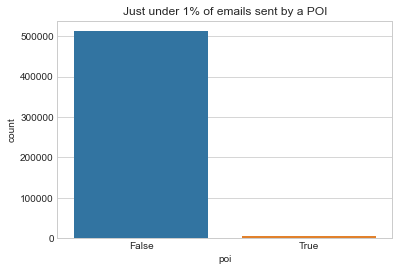

In [225]:
# 1. What percentage of emails were sent by a poi?
print(df2.poi.value_counts())
print()

sns.countplot(df2.poi)
plt.title('Just under 1% of emails sent by a POI')

print((round(df2.poi.value_counts(normalize = True)*100, 2)))

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='polarity'>

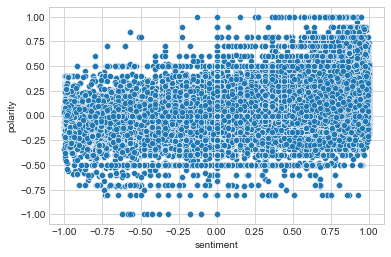

In [226]:
# 2. Is there any correlation between sentiment score / polarity / subjectivity?
sns.scatterplot(df2.sentiment, df2.polarity)

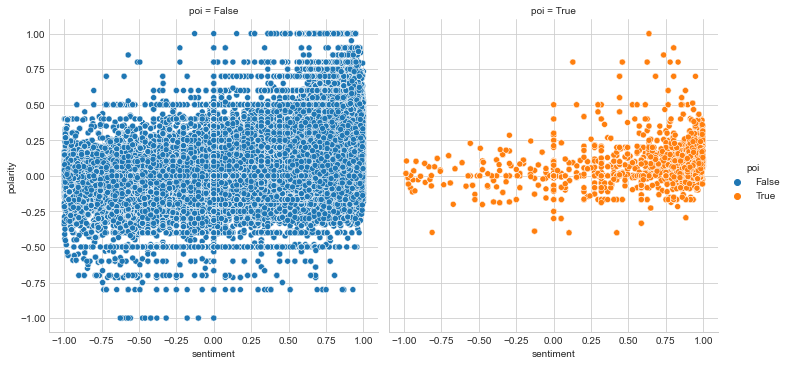

In [227]:
sns.relplot(data = df2, x = 'sentiment', y = 'polarity', hue = 'poi', col = 'poi')

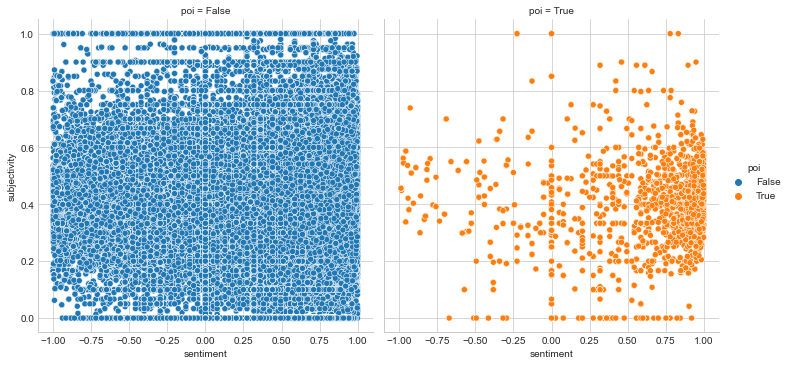

In [128]:
sns.relplot(data = df2, x = 'sentiment', y = 'subjectivity', hue = 'poi', col = 'poi')

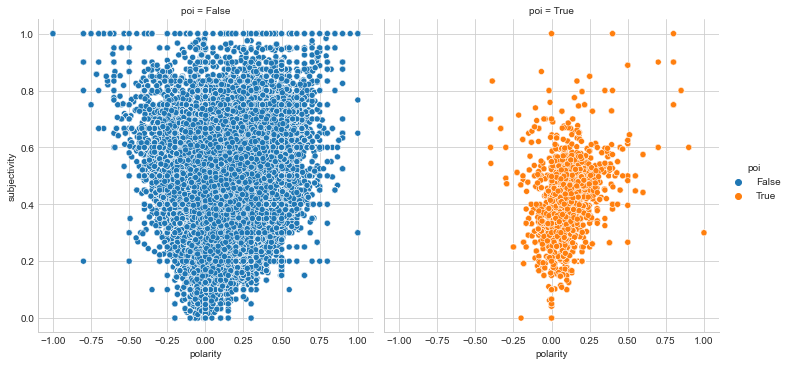

In [129]:
sns.relplot(data = df2, x = 'polarity', y = 'subjectivity', hue = 'poi', col = 'poi')

In [131]:
# adding column to flag internal emails
df2['is_internal'] = df2.sender.str.contains('enron')

# preview
df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal
0,2001-05-14 16:39:00-07:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True
1,2001-05-04 13:51:00-07:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True
2,2000-10-18 03:00:00-07:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True
3,2000-10-23 06:13:00-07:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True
4,2000-08-31 05:07:00-07:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True


In [152]:
# 3. what is the date range for the emails?
print(f'From {df2.date.min()} to {df2.date.max()}')

From 1979-12-31 16:00:00-08:00 to 2044-01-04 14:48:58-08:00


### 2044 does not make sense for a date?
Looking at the dates by year, quarter, month, and day and filtering out dates that don't make sense or do not want to look at right now

In [170]:
# changing date col to datetime object
df2.date = pd.to_datetime(df2.date, utc = True)

In [184]:
# adding cols for year, month, quarter, and day of the week
df2['year'] = df2.date.dt.year

df2['month'] = df2.date.dt.month

df2['qtr'] = df2.date.dt.quarter

df2['day'] = df2.date.dt.day_name()

df2['time'] = df2.date.dt.time

df2['date2'] = df2.date.dt.date


df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,2001-05-14 23:39:00+00:00,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,2001-05-04 20:51:00+00:00,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,2000-10-18 10:00:00+00:00,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,2000-10-23 13:13:00+00:00,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,2000-08-31 12:07:00+00:00,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


In [214]:
df2.groupby('year').agg(['count', 'mean']).sort_values(by = ('sentiment', 'count'), ascending = False)

sentiment           polarity           subjectivity               poi  \
         count      mean    count      mean        count      mean   count   
year                                                                         
2001    272964  0.628773   272964  0.101309       272964  0.378596  272964   
2000    196100  0.616754   196100  0.093467       196100  0.348009  196100   
2002     35974  0.601143    35974  0.095643        35974  0.403271   35974   
1999     11144  0.596910    11144  0.084900        11144  0.339290   11144   
1980       522  0.476752      522  0.078156          522  0.323606     522   
1997       437  0.047668      437  0.056647          437  0.112239     437   
1998       177  0.669849      177  0.075614          177  0.303231     177   
2004        70  0.836727       70  0.176188           70  0.432469      70   
2044         3  0.252867        3  0.150000            3  0.507407       3   
1986         2  0.912250        2  0.153846            2  0.259089       2   
2012         2  0.200950        2 -0.041667            2  0.197619       2   
2020         2  0.249300        2 -0.063636            2  0.837879       2   
2005         1  0.999800        1  0.139555            1  0.442134       1   
2007         1  0.000000        1  0.233333            1  0.433333       1   
2024         1  0.910000        1  0.111526            1  0.480530       1   
2043         1  0.571900        1  0.468182            1  0.727273       1   

               is_internal             month                qtr            
          mean       count      mean   count       mean   count      mean  
year                                                                       
2001  0.005411      272964  0.817917  272964   6.054714  272964  2.397536  
2000  0.014839      196100  0.870464  196100   8.279633  196100  3.058445  
2002  0.002641       35974  0.702507   35974   1.788208   35974  1.097153  
1999  0.001077       11144  0.918162   11144   9.399677   11144  3.375000  
1980  0.003831         522  1.000000     522   1.000000     522  1.000000  
1997  0.000000         437  0.997712     437   7.080092     437  2.652174  
1998  0.000000         177  0.966102     177  11.288136     177  3.915254  
2004  0.000000          70  0.000000      70   2.000000      70  1.000000  
2044  0.000000           3  0.000000       3   1.000000       3  1.000000  
1986  0.000000           2  0.000000       2   4.500000       2  2.000000  
2012  0.000000           2  0.000000       2  11.000000       2  4.000000  
2020  0.000000           2  0.000000       2  12.000000       2  4.000000  
2005  0.000000           1  0.000000       1  12.000000       1  4.000000  
2007  0.000000           1  0.000000       1   2.000000       1  1.000000  
2024  0.000000           1  0.000000       1   5.000000       1  2.000000  
2043  0.000000           1  0.000000       1  12.000000       1  4.000000

#### It would make sense to focus on the years `1997`, `1998`, `1999`, `2000`, `2001`, and `2002`
- Matching timeline
- bulk of data

#### Enrom Timeline: https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron
- 1998: Enron buys Britain's Weessex Water
- Nov 1999: Enron Online (first global commidty trading platform) launches
- Aug 2000: Enron shares hit all time high
- 5 Feb 2001: Arthur Andersen considers not serving Enron due to special partnerships to disguise debt
<hr> 

- **14 Aug 2001: Jeff Skilling (CEO from 12 Feb 2001) resigns for personal reasons**
- 15 Aug 2001: Sheron Watkins (VP) warns Kenneth Lay (CEO) of question accounting practices
- 24 Oct 2001: Andrew Fastow (CFO) is fired
- 8 Nov 2001: Enron announced it overstated profits by 60M going back to 1997
- 2 Dec 2001: Enron files for bankruptsy
- 3 Dec 2001: Eron lays off 4K employees
- 9 Jan 2002: Justice Department investigates Enron
- 24 Jan 2002: Kenneth Lay (CEO) resigns
- 14 Mar 2002: Arthur Andersen indicted
- 31 Oct 2002: Fastow indicted

In [224]:
# filtering date for those dates
df2 = df2[(df2.year == 1997) | (df2.year == 1998) | (df2.year == 1999) | (df2.year == 2000) | (df2.year == 2001) | (df2.year == 2002)]

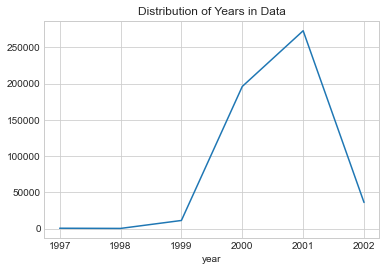

In [253]:
# what is the distribution of years?
df2.groupby('year').count()['date'].plot()
plt.title('Distribution of Years in Data')
plt.show()

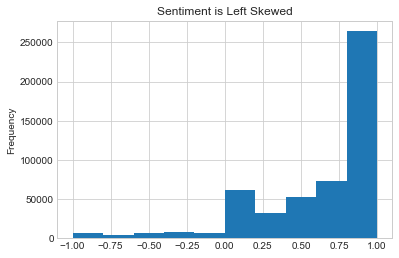

In [240]:
# 4. what are the distributions of the different sentiment scores?
df2.sentiment.plot.hist()
plt.title('Sentiment is Left Skewed')
plt.show()

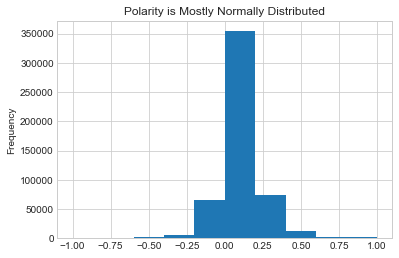

In [242]:
df2.polarity.plot.hist()
plt.title('Polarity is Mostly Normally Distributed')
plt.show()

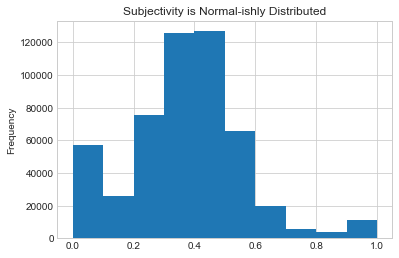

In [243]:
df2.subjectivity.plot.hist()
plt.title('Subjectivity is Normal-ishly Distributed')
plt.show()

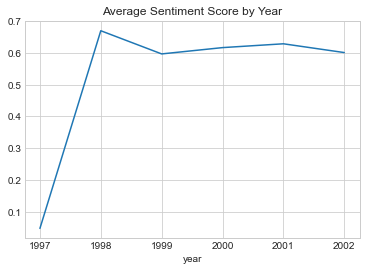

In [260]:
# 5. how do the sentiment scores trend over time?
df2.groupby('year').mean()['sentiment'].plot()
plt.title('Average Sentiment Score by Year')
plt.show()

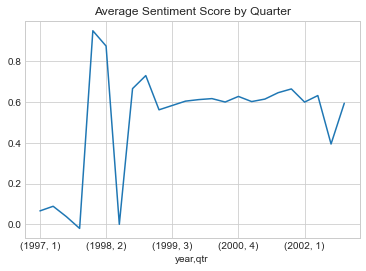

In [259]:
df2.groupby(['year', 'qtr']).mean()['sentiment'].plot()
plt.title('Average Sentiment Score by Quarter')
plt.show()

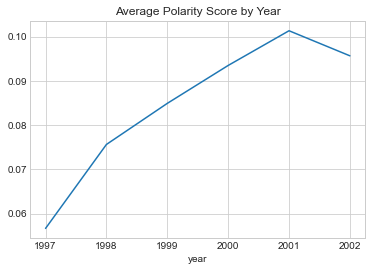

In [246]:
df2.groupby('year').mean()['polarity'].plot()
plt.title('Average Polarity Score by Year')
plt.show()

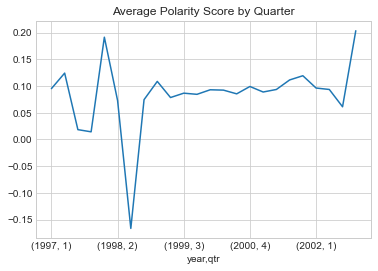

In [258]:
df2.groupby(['year', 'qtr']).mean()['polarity'].plot()
plt.title('Average Polarity Score by Quarter')
plt.show()

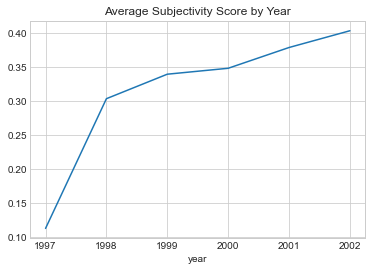

In [247]:
df2.groupby('year').mean()['subjectivity'].plot()
plt.title('Average Subjectivity Score by Year')
plt.show()

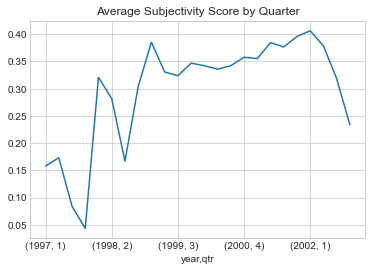

In [261]:
df2.groupby(['year', 'qtr']).mean()['subjectivity'].plot()
plt.title('Average Subjectivity Score by Quarter')
plt.show()

<AxesSubplot:xlabel='day'>

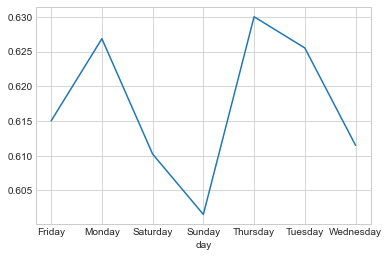

In [264]:
df2.groupby('day').mean()['sentiment'].plot()

<AxesSubplot:xlabel='day'>

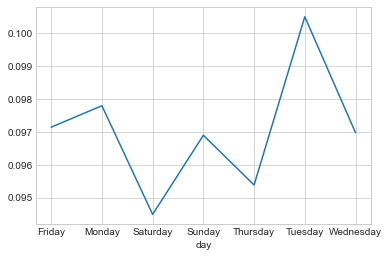

In [290]:
df2.groupby('day').mean()['polarity'].plot()

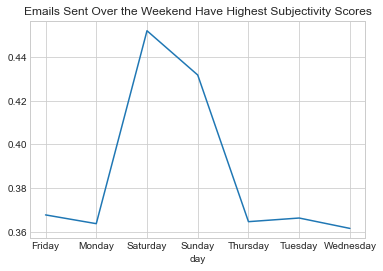

In [293]:
df2.groupby('day').mean()['subjectivity'].plot()
plt.title('Emails Sent Over the Weekend Have Highest Subjectivity Scores')
plt.show()

In [274]:
# sorting days of the week
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# df2.day.astype('category', categories = days_list, ordered = True)

df2.date = pd.Categorical(df2.day, categories = days_list, ordered = True)

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


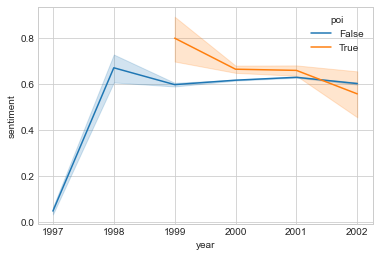

In [305]:
# 6. are the avg sentiment, polarity, and subjectivity scores significantly different between poi's and non poi's?

sns.lineplot(data = df2, x = 'year', y = 'sentiment', hue = 'poi')
plt.title('')
plt.show()

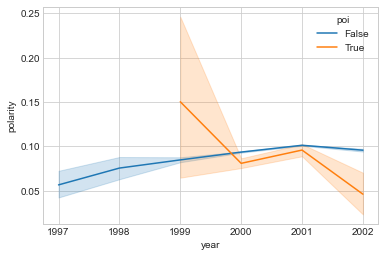

In [306]:
sns.lineplot(data = df2, x = 'year', y = 'polarity', hue = 'poi')
plt.title('')
plt.show()

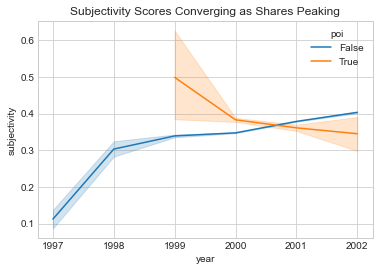

In [308]:
sns.lineplot(data = df2, x = 'year', y = 'subjectivity', hue = 'poi')
plt.title('Subjectivity Scores Converging as Shares Peaking')
plt.show()

In [309]:
df2.head()

,date,file,sender,subject,content,lemmatize,sentiment,polarity,subjectivity,poi,is_internal,year,month,qtr,day,time,date2
0,Monday,allen-p/_sent_mail/1.,phillip.allen@enron.com,NaN,Here is our forecast\n\n,forecast,0.0000,0.00,0.000000,False,True,2001,5,2,Monday,23:39:00,2001-05-14
1,Friday,allen-p/_sent_mail/10.,phillip.allen@enron.com,Re:,Traveling to have a business meeting takes the...,traveling business meeting take fun trip espec...,0.9313,0.15,0.613333,False,True,2001,5,2,Friday,20:51:00,2001-05-04
2,Wednesday,allen-p/_sent_mail/100.,phillip.allen@enron.com,Re: test,test successful. way to go!!!,test successful way go,0.5859,0.75,0.950000,False,True,2000,10,4,Wednesday,10:00:00,2000-10-18
3,Monday,allen-p/_sent_mail/1000.,phillip.allen@enron.com,NaN,"Randy,\n\n Can you send me a schedule of the s...",randy send schedule salary level everyone sche...,0.0000,0.00,0.000000,False,True,2000,10,4,Monday,13:13:00,2000-10-23
4,Thursday,allen-p/_sent_mail/1001.,phillip.allen@enron.com,Re: Hello,Let's shoot for Tuesday at 11:45.,let ' shoot tuesday 1145,-0.3400,0.00,0.000000,False,True,2000,8,3,Thursday,12:07:00,2000-08-31


In [338]:
df2.lemmatize.str.split()

0                                                [forecast]
1         [traveling, business, meeting, take, fun, trip...
2                               [test, successful, way, go]
3         [randy, send, schedule, salary, level, everyon...
4                            [let, ', shoot, tuesday, 1145]
                                ...                        
517396    [trade, oilspechedgeng, john, lavorato, ', boo...
517397    [position, alberta, term, book, send, position...
517398    [2, original, message, &#9;, doucet, dawn, sen...
517399    [analyst, &#9;, &#9;, &#9;, &#9;, &#9;, rank, ...
517400    [think, ymca, class, people, recovering, heart...
Name: lemmatize, Length: 516796, dtype: object

In [340]:
df2.lemmatize[0]

'forecast'

In [ ]:
from copy import deepcopy
from bertopic import BERTopic

## Work starting Tuesday, 2/22
Goals for today:
- read Kan's csv file to df to explore with
- add sentiment scores using his algorithm and mine to explore (see questions for explore [here](https://trello.com/c/d7IxpXIS/25-exploratory-questions)
- Come up with minimum x4 Qs and As and Explore Takeaways
- Start adding work we have done to this point to README project info and slideshow shell


<hr>

### Step 1 | Acquire the data

In [ ]:
# reading in Kan's prepped csv to df for exploration
df = pd.read_csv('csv_files/sentiment.csv')

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head()

In [ ]:
ts = pd.read_csv('csv_files/time_series.csv')

ts.head()

##### I want to make sure the rows line up for both dfs before joining them together..

In [ ]:
# checking row counts
df.shape[0] == ts.shape[0]

In [ ]:
df.shape[0]

In [ ]:
ts.shape[0]

##### They are not `==`  I will go back and look at why later but, for now, just work with the data read in from the `sentiment.csv` file
### Step 2 | Prepare date for explore
1. drop unnecessary columns
2. handle nulls
3. add on my algorithms sentiment scores

In [ ]:
# preview df
df.head(1)

#### 2.1 Drop unnecessary columns

Columns to keep
- `date`
- `sender`
- `subject`
- `lemmatize` >> `msg_content`
- `file` >> `file_directory`
- `sentiment`

In [ ]:
df = df[['date', 'sender', 'subject', 'lemmatize', 'file', 'sentiment']]

df.head(1)

#### 2.2 Handle nulls

In [ ]:
# looking at null counts as a percentage of total data count
(df.isna().sum()/df.shape[0])*100

**Columns with nulls**
- `subject` >> these are emails without a subject, don't want to drop these, instead will flag by filling `nan` value with str value `no_subject`
- `lemmatize` >> these are emails with no `Nan` or empty email values, small fraction but want to see if anything interesting here >> I want to look at this but will likely flag with str value `empty_text`
- `sentiment` >> no sentiment score, for now such a small % of total will drop these

##### Looking at the rows with `Null` values for the email text

In [ ]:
no_text = df[df.lemmatize.isna() == True]

no_text

In [ ]:
# looking at the sentiment score for these emails
no_text.sentiment.value_counts()

In [ ]:
# looking at the sender
no_text.sender.value_counts()

##### I am okay with dropping these for now. They all have 0 sentiment scores and, unless `matthew.lenhart@enron.com` is a person of interest I do not see where I would need these. 
I am thinking that a lot of the emails may just have attachments?

In [ ]:
# filling null subject values with flag >> no_subject
df.subject.fillna('no_subject', inplace = True)

In [ ]:
# making sure went through
df[df.subject == 'no_subject']

#### Looking at the null emails

In [ ]:
df[df.lemmatize.isna() == True]

### Splitting data for exploration
Enrom Timeline: https://www.theguardian.com/business/2006/jan/30/corporatefraud.enron
- 1998: Enron buys Britain's Weessex Water
- Nov 1999: Enron Online (first global commidty trading platform) launches
- Aug 2000: Enron shares hit all time high
- 5 Feb 2001: Arthur Andersen considers not serving Enron due to special partnerships to disguise debt
<hr> 

- **14 Aug 2001: Jeff Skilling (CEO from 12 Feb 2001) resigns for personal reasons**
- 15 Aug 2001: Sheron Watkins (VP) warns Kenneth Lay (CEO) of question accounting practices
- 24 Oct 2001: Andrew Fastow (CFO) is fired
- 8 Nov 2001: Enron announced it overstated profits by 60M going back to 1997
- 2 Dec 2001: Enron files for bankruptsy
- 3 Dec 2001: Eron lays off 4K employees
- 9 Jan 2002: Justice Department investigates Enron
- 24 Jan 2002: Kenneth Lay (CEO) resigns
- 14 Mar 2002: Arthur Andersen indicted
- 31 Oct 2002: Fastow indicted

<hr>
For time series modeling, really meant for data that has seasonal trends not where there is a unique event (anomoly likely to disrupt normal trends) >> story explain the gap in what was projected to happen by prophet and what actually happened // doing an autopsy of what happened >> taking apart a dead body when exploring full dataset // what is the language of fraud (exploratory task, looking at word frequency during certain times) // topic modeling for modeling, and time series and sentiment analysis is more for telling the story // topic modeling is unsupervised learning tool >> use on all of data

In [ ]:
df.info()

##### I need to change the `date` colum to datetime format and then split by date

In [ ]:
# changing date column dtype
df.date = pd.to_datetime(df.date, utc = True)

df.head()

In [ ]:
# getting the size of data by splitting by 08/13 before and after
df[df.date <= '2001-08-13'].shape[0], df[df.date > '2001-08-13'].shape[0]

In [ ]:
# splitting the data
train = df[df.date <= '2001-08-13']
test = df[df.date > '2001-08-13']

# Q1. What is the distribution of sentiment scores?

In [ ]:
train.sentiment.hist()
plt.title('Sentiment Scores are Mostly Positive')
plt.show()

#### A1. The sentiment scores are mostly postive, strongly left skewed. 
There is a bump where they are neutral and the lower sentiment scores, less than 0, are anomalies that I want to investigate.

# Q2. Who has the highest and lowest sentiment scores?

In [ ]:
# top sentiment scores
train.groupby('sender').agg('mean').sort_values(by = ['sentiment'], ascending = False).head(50)

In [ ]:
train.groupby('sender').agg('mean').sort_values(by = ['sentiment'], ascending = False).tail(50)

##### Takeaways
- When grouping emails by sender, the top 50 average sentiment scores are from non-Enron email address
- 

# Q3. Who is sending the most emails?

In [ ]:
train.sender.value_counts().head(10)

In [ ]:
plt.figure(figsize = (10, 7))

train.sender.value_counts().head(10).sort_values().plot.barh()
plt.title('Who Sent the Most Emails?')
plt.show()

#### Most emails are coming from within Enron
- Kay Mann
- Vince Kaminski
- Jeff Dasovich

# Q5. What proportion of emails are internal/external to Enron?
- Do emails from outside of company have higher or lower average sentiment scores?

In [ ]:
# emails from within in enron
internal = train[train.sender.str.contains('enron')]
internal.head()

In [ ]:
# external emails
external = train[~train.sender.str.contains('enron')]
external.head()

In [ ]:
print(f'Internal emails: {internal.shape[0]}\nExternal emails: {external.shape[0]}')
print(f'Difference: {internal.shape[0] - external.shape[0]}')
print()
print(f'Ratio: {int(internal.shape[0]/train.shape[0]*100)}% of emails are from within Enron.')

#### Creating another feature to explore `internal`
- will add to `test` data if used in mdoeling

In [ ]:
# adding to test
train['is_internal'] = train.sender.str.contains('enron')

train.head()

In [ ]:
plt.figure(figsize = (5, 12))

train.groupby('is_internal').mean().plot.bar()
plt.ylabel('Sentiment Score')
plt.xlabel('Internal Email?')
plt.xticks(rotation = 360)
plt.title('Internal Emails Have Slightly Lower Sentiment')
plt.show();

In [ ]:
train.sort_values(by = 'sentiment', ascending = False).lemmatize[0]

In [ ]:
df.date.max()

In [ ]:
df.date.min()

In [ ]:
train.groupby('date').mean()

In [ ]:
stop_running_notebook_code >> here

## Work done week0

## Acquire
Emails library documentation: [link](https://docs.python.org/3/library/email.html)<br>
Data source: [link](https://www.kaggle.com/wcukierski/enron-email-dataset)

In [ ]:
# standard python imports
import numpy as np
import pandas as pd

# imports from python emails library
from email.parser import Parser

In [ ]:
# reading csv to df
df = pd.read_csv('../emails.csv')

df.head()

In [ ]:
# getting size of df
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns of data.')

In [ ]:
# looking at the first message to begin the process of parsing out the message text
df.message[0]

### The message has some key compents that we can parse out using the `emails` Python Library
- `datetime`
- `sender`
- `recipient`
- `subject`
- `message content` 

In [ ]:
# looking to see if pattern matches in other messages
print(df.message[1])
print()
print(df.message[23])
print()
print(df.message[54])

### Something else to possibly look at for later would be cc and bcc recipients as well as forwarding
If there were any/quantity/who they were/how. many times a message was forwarded

In [ ]:
# saving x1 test message to variable to write code for function that will loop through all messages
message = df.message[63]

# function step 1 | getting full message data
message = Parser().parsestr(message)

# looking at output Parsed message object
message

In [ ]:
# looking at printout of Parsed message object
print(message)

In [ ]:
# looking at the message dtype
type(message)

### We can use the [email.message.Message](https://docs.python.org/3/library/email.compat32-message.html) documents to further parse the message info

In [ ]:
# parsed message text content
text = message.get_payload()
text

In [ ]:
# looking at text printout
print(text)

In [ ]:
# parsing sender
sender = message['From']
sender

In [ ]:
# parsing recipient
recip = message['To']
recip

### `recip` will be something to possibly look at post MVP
- number of recipients
- frequency of certainr recipient groups

In [ ]:
# parsing message date
date = message['Date']
date

In [ ]:
# # running dataframe message contents through for loop that will above code to parse contents and save to lists

# # empty lists to be appended in for loop and added to df later
# content = []
# date = []
# sender = []

# # for loop 
# for string in df.message:
#     message = Parser().parsestr(string)
#     msg_content = message.get_payload()
#     msg_date = message['Date']
#     msg_sender = message['From']
#     # adding to empty lists
#     content.append(msg_content)
#     date.append(msg_date)
#     sender.append(msg_sender)

### Skipping ahead and using code from `acquire.pj.py` file in PJ's folder

In [ ]:
def acquire_emails():
    df = pd.read_csv('../emails.csv')

    bodies = []
    dates = []

    # loop through email messages
    for i in df.message:
        # parse and set message to email data type
        headers = Parser().parsestr(i)
        # get the body text of the email
        body = headers.get_payload()
        # get the date from email
        date = headers['Date']
        # append date and body text to lists
        bodies.append(body)
        dates.append(date)

    # Set lists to dataframes
    body_df = pd.DataFrame(bodies, columns = ['Content'])
    dates_df = pd.DataFrame(dates, columns = ['Content'])

    # Insert those data frames into our orignal dataframe
    df.insert(1, "content", body_df)
    df.insert(1, "date", dates_df)

    return df

In [ ]:
raw_data = pd.read_csv('raw_data.csv')

raw_data.head()

### For prepare using `stem` for MVP because it is faster. 
Also saving removing stop words for post MVP work
- lowercase
- dtypes
- nulls

In [ ]:
import prepare_steph as prepare

In [ ]:
def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
            .encode('ascii', 'ignore')\
            .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

In [ ]:
raw_data.content[54]

In [ ]:
import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import acquire_pj
from time import strftime

from sklearn.model_selection import train_test_split

basic_clean(raw_data.content[54])

In [ ]:
print(basic_clean(raw_data.content[54]))

In [ ]:
raw_data.head(10)['content'].apply(basic_clean)

In [ ]:
# # caching raw data
# raw_data.to_csv('raw_data.csv')

In [ ]:
import pandas as pd 

df_2 = pd.read_csv('clean_data.csv')

In [ ]:
df_2.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], inplace = True)

In [ ]:
df_2.head()

### Sentiment Analysis Code

In [ ]:
# imports
import math
import re
import string
from itertools import product

import nltk.data
from nltk.util import pairwise

In [ ]:
df_2.clean.dropna(inplace = True)

## terminal command to install textblob library >> `pip install textblob`
Textblob sentiment analyzer returns two properties for a given input sentence: 
- `Polarity` is a float that lies between [-1,1], 
    - -1 indicates negative sentiment and +1 indicates positive sentiments. 
- `Subjectivity` is also a float which lies in the range of [0,1]. 
    - Subjective sentences generally refer to personal opinion, emotion, or judgment. 
    
[Info Source](https://neptune.ai/blog/sentiment-analysis-python-textblob-vs-vader-vs-flair#:~:text=Textblob%20sentiment%20analyzer%20returns%20two,of%20%5B0%2C1%5D.)

In [ ]:
# installing textblob library for sentiment analysis scoring
from textblob import TextBlob

In [ ]:
# writing code for one content to test out scoring function
test_1 = df_2.clean[1]
test_2 = df_2.clean[4]
test_3 = df_2.clean[88]

In [ ]:
print(TextBlob(test_1).sentiment)
print('-----------------------')
print(test_1)

In [ ]:
sent, sub = TextBlob(test_3).sentiment

In [ ]:
sent

In [ ]:
def sentiment_scores(string):
    '''
    
    '''
    
    polarity, subjectivity = TextBlob(string).sentiment
    
    return polarity, subjectivity

In [ ]:
def add_scores(df, clean_msg_col):
    '''
    
    '''
    
    df['polarity, subjectivity'] = df[clean_msg_col].apply(sentiment_scores)
    
    pol = []
    subj = []
    for tuple_ in df['polarity, subjectivity']:
        pol.append(list(tuple_)[0])
        subj.append(list(tuple_)[1])
    
#     df = df.drop(columns = ['polarity, sentiment'])
    df['polarity'] = pol
    df['subjectivity'] = sent
    
    return df

In [ ]:
test_df = add_scores(df_2.head(50), 'clean')
test_df[['clean', 'polarity, subjectivity']]

In [ ]:
test_df.clean[1]

In [ ]:
test_df[test_df.polarity == test_df.polarity.max()]

In [ ]:
test_df.content[21]

In [ ]:
test_df[test_df.polarity == test_df.polarity.min()]

In [ ]:
test_df.content[27]